In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("data-export (1).csv")

In [20]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [16]:
df.columns=df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group","DateHour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [27]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,NaT,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,NaT,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,NaT,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,NaT,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,NaT,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             0 non-null      datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [33]:
df["DateHour"] = pd.to_datetime(df["DateHour"].astype(str), format="%Y%m%d%H", errors='coerce')

In [52]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,NaT,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,NaN
1,Organic Social,NaT,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,NaN
2,Direct,NaT,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,NaN
3,Organic Social,NaT,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,NaN
4,Organic Social,NaT,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,NaN


In [40]:
numeric_cols = df.columns.drop(["channel group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"] =df["DateHour"].dt.hour

In [49]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,0,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,0.0
mean,NaT,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,NaN
min,NaT,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,NaT,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,NaN
50%,NaT,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,NaN
75%,NaT,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,NaN
max,NaT,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,NaN
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,NaN


In [46]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors="coerce")
df["Hour"] = df["DateHour"].dt.hour

In [50]:
df["DateHour"] = pd.to_datetime(df["DateHour"].astype(str), format="%Y%m%d%H", errors="coerce")
df["Hour"] = df["DateHour"].dt.hour

In [53]:
df.columns.tolist()

['channel group',
 'DateHour',
 'Users',
 'Sessions',
 'Engaged Sessions',
 'Average engagement time per session',
 'Engaged sessions per user',
 'Events per session',
 'Engagement rate',
 'Event count',
 'Hour']

In [54]:
df.rename(columns={
    'Session primary channel group (Default channel group)': 'channel_group',
    'Date + hour (YYYYMMDDHH)': 'DateHour'
}, inplace=True)

In [55]:
df[["DateHour"]].head()

,DateHour
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT


In [56]:
df["DateHour"] = pd.to_datetime(df["DateHour"].astype(str), format="%Y%m%d%H", errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [58]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,0,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,0.0
mean,NaT,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,NaN
min,NaT,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,NaT,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,NaN
50%,NaT,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,NaN
75%,NaT,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,NaN
max,NaT,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,NaN
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,NaN


# Sessions and User over Time 

In [61]:
sns.set(style="whitegrid")

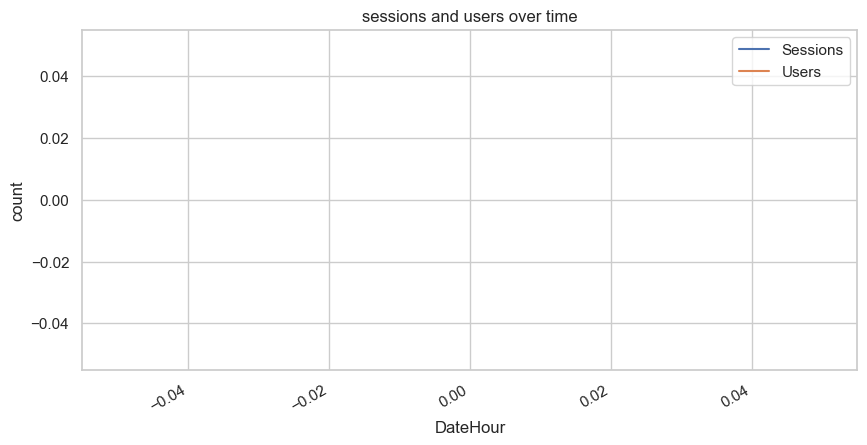

In [64]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

#Average Engagement Time By Channel

C:\Users\Shajith\AppData\Local\Temp\ipykernel_26180\1972203001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x="channel group",y="Users",estimator=np.sum,palette="viridis")


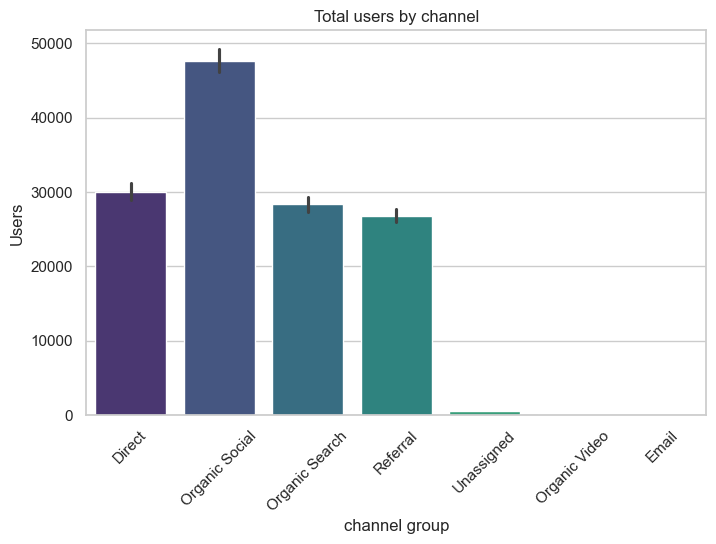

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x="channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

# Total user by Channel

C:\Users\Shajith\AppData\Local\Temp\ipykernel_26180\1972203001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x="channel group",y="Users",estimator=np.sum,palette="viridis")


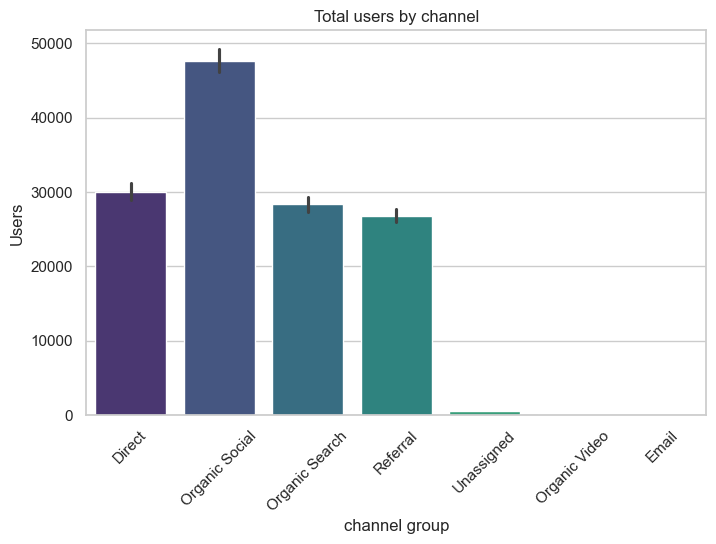

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x="channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

C:\Users\Shajith\AppData\Local\Temp\ipykernel_26180\732501043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group",y="Average engagement time per session", estimator=np.mean,palette="magma")


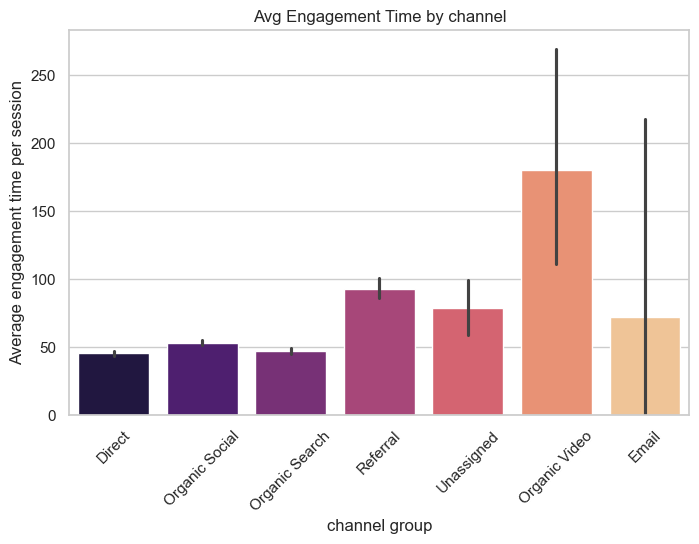

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group",y="Average engagement time per session", estimator=np.mean,palette="magma")
plt.title("Avg Engagement Time by channel")
plt.xticks(rotation=45)
plt.show()

# Engagement Rate Distribution by channel

C:\Users\Shajith\AppData\Local\Temp\ipykernel_26180\1123592944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group",y="Engagement rate",palette ="coolwarm")


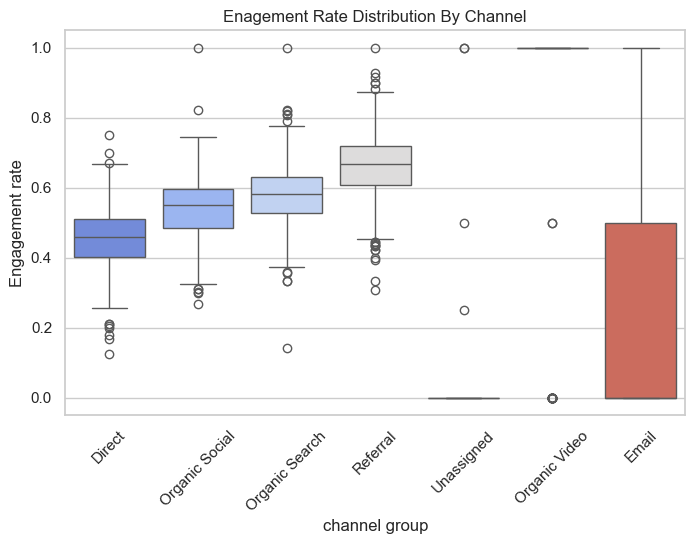

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="channel group",y="Engagement rate",palette ="coolwarm")
plt.title("Enagement Rate Distribution By Channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non Engaged sessions

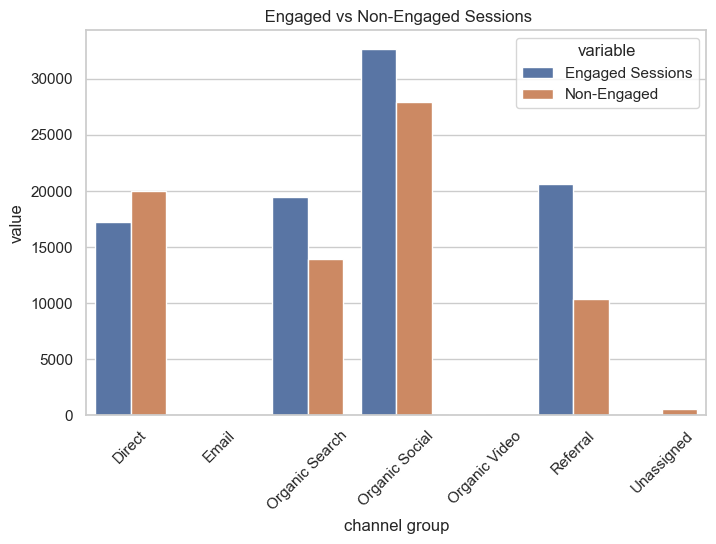

In [78]:
session_df=df.groupby("channel group") [["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"]= session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged Sessions", "Non-Engaged"])
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title(" Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Traffic by Hour and channel 

In [83]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x600 with 0 Axes>

# Engagement Rate vs Sessions Over time

In [86]:
df_plot = df.groupby("DateHour") [["Engagement rate","Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"],df_plot["Enagement rate"],label="Engagement rate",color="green")
plt.plot(df_plot["DateHour"],df_plot["Sessions"], label ="Sessions", color="blue")
plt.title(" Engagement Rate vs Sessions Over time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Enagement rate'

<Figure size 1000x500 with 0 Axes>